In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [40]:
np.random.seed(42)

# creates a matrix of 100 X 1 of numbers from 0 to 1 
x = np.random.rand(100, 1)
assert x.shape == (100, 1)

In [41]:
y = 1 + 2 * x +.1 * np.random.randn(100, 1)

In [42]:
# creates an array from 0 to 100
idx = np.arange(100)
np.random.shuffle(idx)

In [43]:
# Training index
train_idx = idx[:80]

# Validation indices
val_idx = idx[80:]

In [44]:
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Training Set


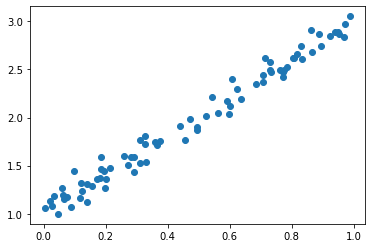

In [45]:
plt.scatter(x_train, y_train)
print("Training Set")
plt.show()

Validation Set


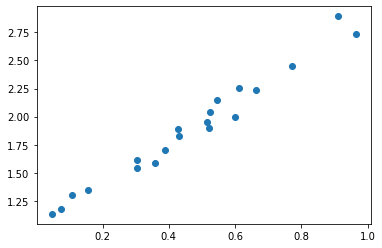

In [46]:
plt.scatter(x_val, y_val)
print("Validation Set")
plt.show()

In [47]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

In [48]:
print(a, b)

[0.49671415] [-0.1382643]


In [49]:
# learning rate
lr = 1e-1
# number of epochs
n_epochs = 1000

In [50]:
for epoch in range(n_epochs):
    # compute predicted output
    y_hat = a + b * x_train
    
    error = y_train - y_hat
    # compute mse
    loss = (error ** 2).mean()
    
    # compute the gradients
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # update parameters
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

[1.02354094] [1.96896411]


In [54]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


In [62]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

In [85]:
# checks if the GPU is available, if not it uses the cpu
device_name = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_name)

In [86]:
# convert numpy arrays into the tensor data structure
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

In [87]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [139]:
# In order to send these parameters to the right device, we must set 
# it up like this
torch.manual_seed(42)

a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [140]:
for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # this is what we want to minimize and compute the gradient of
    loss.backward()
    
    # We use no grad to keep the update out of the gradient computation
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
        
    # gradients are accumlated (ex: it will continue to add on the 
    # previous gradient value). This will zero it out
    
    a.grad.zero_()
    b.grad.zero_()
print(a, b)    

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [156]:
torch.manual_seed(42)

a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

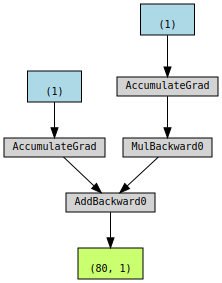

In [157]:
# yhat = a + b * x_train_tensor

# blue boxes - the tensors we use as parameters (a and b)
# gray boxes - a python operation that involves a gradient computing tensor
# green box - starting point for the computation of gradients 
# we don't have a box for our data (x_train_tensor) 
# because we are not computing gradients on it

# the graph only shows gradient computing tensors and its dependencies
make_dot(yhat)

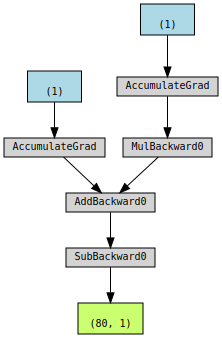

In [150]:
make_dot(error)

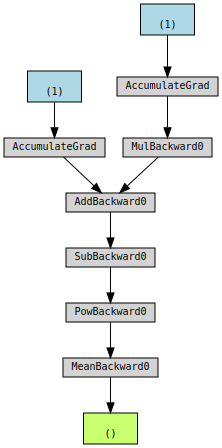

In [153]:
make_dot(loss)

In [163]:
# using the SGD optimizer

torch.manual_seed(42)
a = torch.randn(1, requires_grad = True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad = True, dtype=torch.float, device=device)

print(a, b)

lr = 1e-1
n_epochs = 1000

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # computes the gradient with respect to the parameters specificed
    # as requires gradient equals True
    loss.backward()
    
    # replacing the manual update of parameters
    optimizer.step()
    
    # do not accumlate gradients
    optimizer.zero_grad()

print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [165]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(a, b)

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    loss = loss_fn(y_train_tensor, yhat)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [170]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # nn.Parameter makes them a parameter of the model
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # compute the prediction
        return self.a + self.b * x

In [171]:
torch.manual_seed(42)

model = ManualLinearRegression().to(device)

# inspect the model parameters
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # this does not perform a training step, it sets the model
    # to training mode
    model.train()
    
    # this computes the prediction
    yhat = model(x_train_tensor)
    
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
print(model.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])
OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])


In [176]:
class LayerLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # the same as our custom parameters, use a linear layer with 
        # a single input and output
        self.linear = nn.Linear(1, 1)
        
    # compute the prediction
    def forward(self, x):
        return self.linear(x)

In [177]:
# get parameters of model
[*LayerLinearRegression().parameters()]

[Parameter containing:
 tensor([[ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146], requires_grad=True)]

In [182]:
# we can also create a linear layer in one step
model = nn.Sequential(nn.Linear(1, 1)).to(device)

In [201]:
torch.manual_seed(42)

model = ManualLinearRegression().to(device)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

print(model.state_dict())

# create the training step in a function

def make_train_step(model, loss_fn, optimizer):
    # this is the training loop
    def train_step(x, y):
        # set the model to train mode
        model.train()
        # make prediction
        yhat = model(x)
        # compute the loss
        loss = loss_fn(y, yhat)
        # compute the gradient
        loss.backward()
        # update the parameters and zero out the gradients
        optimizer.step()
        optimizer.zero_grad()
        # Return the loss
        return loss.item()
    return train_step

train_step = make_train_step(model, loss_fn, optimizer)
losses = []

for epoch in range(n_epochs):
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])


In [202]:
losses[-20:]

[0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273,
 0.008044655434787273]

In [203]:
for parameter in model.parameters():
    print(parameter)

model.state_dict()

Parameter containing:
tensor([1.0235], requires_grad=True)
Parameter containing:
tensor([1.9690], requires_grad=True)


OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])

In [205]:
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
    
    def __getitem__(self, index):
        return (self.x[index], self.y[index])
    
    def __len__(self):
        return len(self.x)

x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

# if our dataset is just tensors below is the same as setting up our 
# CustomDataset
train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))
(tensor([0.7713]), tensor([2.4745]))


In [206]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

In [209]:
next(iter(train_loader))

[tensor([[0.2809],
         [0.8287],
         [0.1560],
         [0.5613],
         [0.1960],
         [0.9869],
         [0.7081],
         [0.9489],
         [0.1409],
         [0.9699],
         [0.3117],
         [0.3585],
         [0.8872],
         [0.1159],
         [0.8084],
         [0.0206]]),
 tensor([[1.5846],
         [2.7388],
         [1.2901],
         [2.0472],
         [1.4393],
         [3.0520],
         [2.3660],
         [2.8903],
         [1.1211],
         [2.9727],
         [1.7637],
         [1.7462],
         [2.8708],
         [1.1603],
         [2.6141],
         [1.1327]])]

In [210]:
losses = []

torch.manual_seed(42)

model = ManualLinearRegression().to(device)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        # this only sends one mini-batch to the device
        # the best way is to load all data into a CPU tensor and then
        # send mini batches to the GPU
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        losses.append(loss)

print(model.state_dict())

OrderedDict([('a', tensor([1.0254])), ('b', tensor([1.9693]))])


In [211]:
from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=train_dataset, batch_size=20)


In [212]:
losses = []
val_losses = []
torch.manual_seed(42)

model = ManualLinearRegression().to(device)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        
        losses.append(loss)
    # disables any gradient calculation
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            # sets the model to evaluation mode
            model.eval()
            
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())


In [213]:
print(model.state_dict())

OrderedDict([('a', tensor([1.0196])), ('b', tensor([1.9666]))])


In [215]:
losses[-10:]

[0.007936665788292885,
 0.00913272611796856,
 0.0071699246764183044,
 0.008547837845981121,
 0.012191972695291042,
 0.007936665788292885,
 0.00913272611796856,
 0.0071699246764183044,
 0.008547837845981121,
 0.012191972695291042]

In [216]:
val_losses[-10:]

[0.009594408795237541,
 0.011247535236179829,
 0.007542886771261692,
 0.007245482411235571,
 0.009594408795237541,
 0.011247535236179829,
 0.007542886771261692,
 0.007245482411235571,
 0.009594408795237541,
 0.011247535236179829]